# deskripsi library yang digunakan

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [69]:
df = pd.read_csv('fish.csv')

# Deskripsi Dataset

Spesies : Nama spesies ikan

Weight  : Berat ikan dalam gram

Length1 : Panjang vertikal dalam cm

Length2 : Panjang diagonal dalam cm

Length3 : Panjang silang dalam cm

Height  : Tinggi dalam cm

Width   : Lebar diagonal dalam cm

In [70]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [72]:
pd.unique(df["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<Axes: >

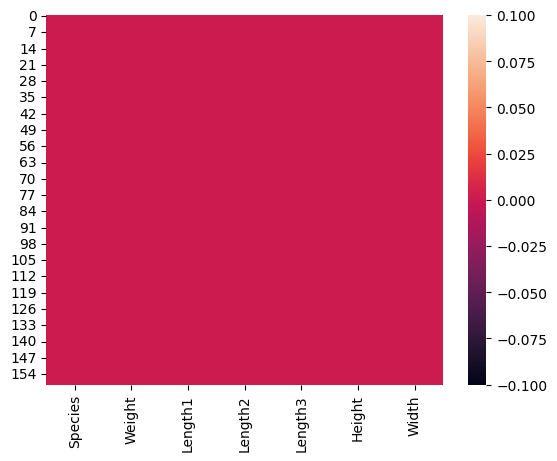

In [73]:
sns.heatmap(df.isnull())

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [75]:
df.duplicated().sum()

0

# Visualisasi Data

C:\Users\lizap\AppData\Local\Temp\ipykernel_52740\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

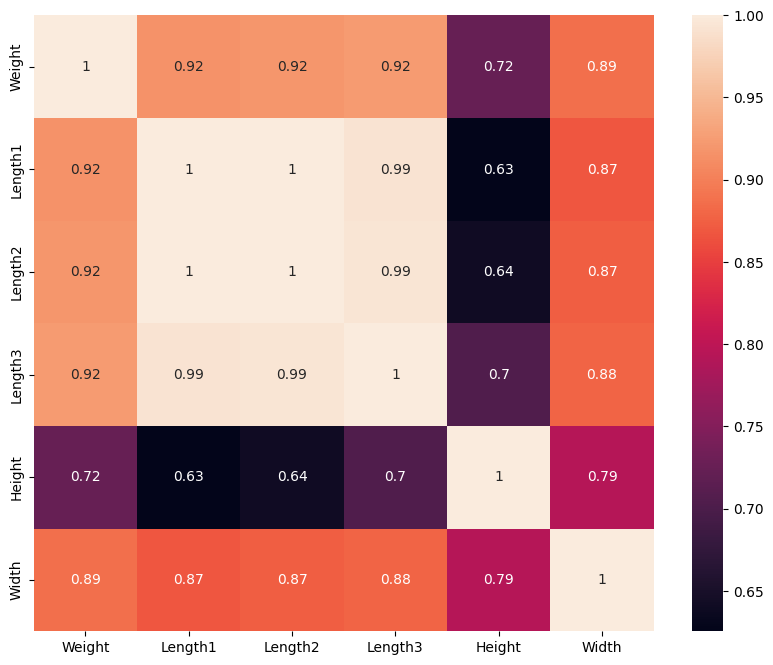

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Ikan Bersadarkan Species

In [77]:
Specieses = df.groupby('Species').count()[['Width']].reset_index()
Specieses = Specieses.rename(columns={'Width':'Number Of Fishes'})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bream'),
  Text(1, 0, 'Parkki'),
  Text(2, 0, 'Perch'),
  Text(3, 0, 'Pike'),
  Text(4, 0, 'Roach'),
  Text(5, 0, 'Smelt'),
  Text(6, 0, 'Whitefish')])

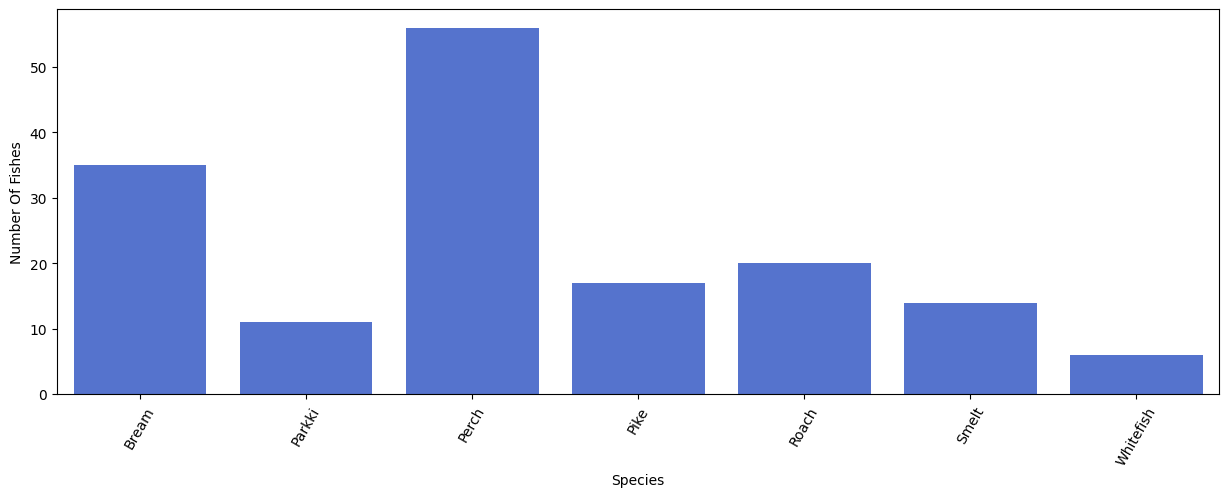

In [78]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Specieses['Species'], y=Specieses['Number Of Fishes'], color='royalblue')
plt.xticks(rotation=60)

# Distribusi Height

C:\Users\lizap\AppData\Local\Temp\ipykernel_52740\675045278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

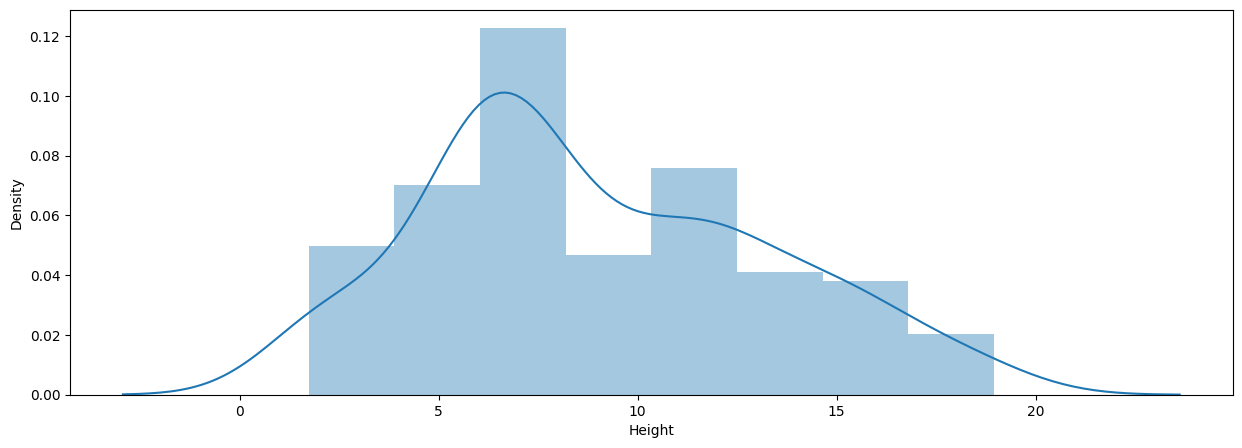

In [79]:
plt.figure(figsize=(15,5))
sns.distplot(df['Height'])

# Distribusi Width

C:\Users\lizap\AppData\Local\Temp\ipykernel_52740\504419958.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Width'])


<Axes: xlabel='Width', ylabel='Density'>

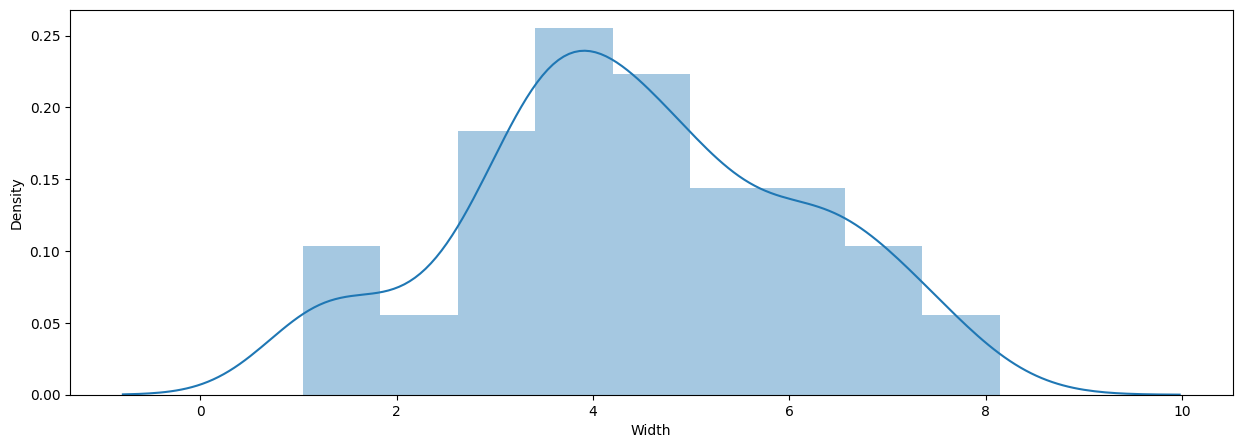

In [80]:
plt.figure(figsize=(15,5))
sns.distplot(df['Width'])

# seleksi fitur

In [81]:
features = ['Length1','Length2','Length3','Height','Width']
x = df[features]
y = df['Weight']
x.shape, y.shape

((159, 5), (159,))

# split data training dan data testing

In [82]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(40,)

# membuat model regresi linier

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [84]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  84.53166287570828 %


# membuat inputan model regresi linier

In [85]:
#Length1,Length2,Length3,Height,Width
input_data = np.array([[30.9,33.5,38.6,15.633,5.1338]])

prediction = lr.predict(input_data)
print('Estimasi Berat Ikan :', prediction)

Estimasi Berat Ikan : [631.44053597]


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [86]:
import pickle

filename = 'estimasi_ikan.sav'
pickle.dump(lr,open(filename,'wb'))